# Usage

In [ ]:
import armageddon
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('ggplot')

### solver

#### Earth with an exponential atmosphere

In [11]:
import armageddon

# Scenario: impact on Earth with an exponential atmosphere
#(do not need to set any parameters)
earth = armageddon.Planet()

In [12]:
%%time
# method 1 
# need to set initial conditions for ateroid
result, outcome = earth.impact(radius=10, angle=45, strength=1e5, 
                               velocity=21e3, density=3000)

Wall time: 953 ms


In [13]:
# total data
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,21000.000000,1.256637e+07,45.000000,100000.000000,0.000000,10.000000,0.00,0.000000
1,21000.345527,1.256637e+07,44.994372,99257.568239,731.072292,10.000000,0.05,-0.029095
2,21000.690895,1.256636e+07,44.988742,98515.197217,1462.312324,10.000000,0.10,-0.029059
3,21001.036090,1.256636e+07,44.983111,97772.886969,2193.720135,10.000000,0.15,-0.029020
4,21001.381100,1.256635e+07,44.977478,97030.637530,2925.295764,10.000000,0.20,-0.028976
5,21001.725911,1.256635e+07,44.971844,96288.448935,3657.039249,10.000000,0.25,-0.028929
6,21002.070505,1.256634e+07,44.966208,95546.321218,4388.950629,10.000000,0.30,-0.028877
7,21002.414865,1.256634e+07,44.960571,94804.254416,5121.029940,10.000000,0.35,-0.028820
8,21002.758971,1.256633e+07,44.954933,94062.248565,5853.277221,10.000000,0.40,-0.028757
9,21003.102803,1.256632e+07,44.949293,93320.303704,6585.692505,10.000000,0.45,-0.028688


In [14]:
# outcome about impact and airburst stats
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 74.06762120249893,
 'burst_altitude': 29058.306698746183,
 'burst_total_ke_lost': 467.8505294181328}

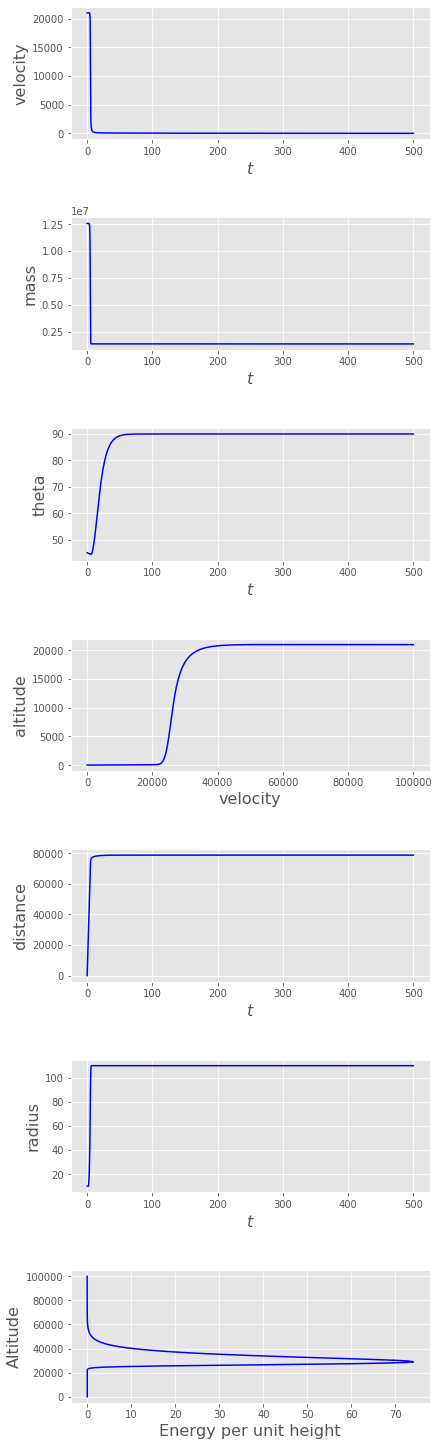

In [15]:
# plot result
armageddon.plot_element_6(result)

In [16]:
# method 2 can get the same results from method 1
result = earth.solve_atmospheric_entry(
    radius=10, angle=45, strength=1e5, velocity=21e3, density=3000)
result = earth.calculate_energy(result)
outcome = earth.analyse_outcome(result)

In [17]:
# total data
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,21000.000000,1.256637e+07,45.000000,100000.000000,0.000000,10.000000,0.00,0.000000
1,21000.345527,1.256637e+07,44.994372,99257.568239,731.072292,10.000000,0.05,-0.029095
2,21000.690895,1.256636e+07,44.988742,98515.197217,1462.312324,10.000000,0.10,-0.029059
3,21001.036090,1.256636e+07,44.983111,97772.886969,2193.720135,10.000000,0.15,-0.029020
4,21001.381100,1.256635e+07,44.977478,97030.637530,2925.295764,10.000000,0.20,-0.028976
5,21001.725911,1.256635e+07,44.971844,96288.448935,3657.039249,10.000000,0.25,-0.028929
6,21002.070505,1.256634e+07,44.966208,95546.321218,4388.950629,10.000000,0.30,-0.028877
7,21002.414865,1.256634e+07,44.960571,94804.254416,5121.029940,10.000000,0.35,-0.028820
8,21002.758971,1.256633e+07,44.954933,94062.248565,5853.277221,10.000000,0.40,-0.028757
9,21003.102803,1.256632e+07,44.949293,93320.303704,6585.692505,10.000000,0.45,-0.028688


In [18]:
# outcome about impact and airburst stats
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 74.06762120249893,
 'burst_altitude': 29058.306698746183,
 'burst_total_ke_lost': 467.8505294181328}

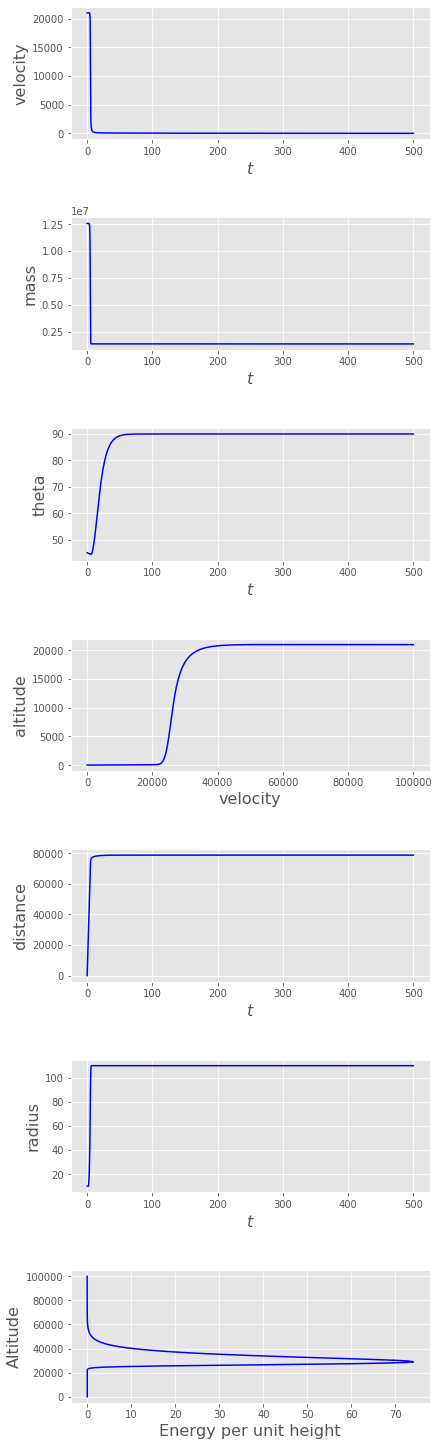

In [19]:
# plot result
armageddon.plot_element_6(result)

#### Earth with tabulated terrestrial atmosphere

In [20]:
import armageddon

# Scenario: impact on  Earth with tabulated terrestrial atmosphere
# change atmos_func to 'tabular' and give file name to read data

earth = armageddon.Planet(atmos_func='tabular', 
                          atmos_filename='data/AltitudeDensityTable.csv')

In [21]:
%%time
# method 1
result, outcome = earth.impact(radius=10, angle=45, strength=1e5, 
                               velocity=21e3, density=3000, init_altitude=80e3)

Wall time: 899 ms


In [22]:
# method 2 can get the same results from method 1
result = earth.solve_atmospheric_entry(
    radius=10, angle=45, strength=1e5, velocity=21e3, density=3000, init_altitude=86e3)
result = earth.calculate_energy(result)
outcome = earth.analyse_outcome(result)

In [23]:
# total data
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,21000.000000,1.256637e+07,45.000000,86000.000000,0.000000,10.00000,0.00,0.000000
1,21000.345154,1.256637e+07,44.994357,85257.568337,732.657572,10.00000,0.05,-0.028977
2,21000.690032,1.256636e+07,44.988713,84515.197614,1465.483596,10.00000,0.10,-0.028909
3,21001.034616,1.256636e+07,44.983068,83772.887870,2198.478109,10.00000,0.15,-0.028834
4,21001.378874,1.256635e+07,44.977421,83030.639143,2931.641146,10.00000,0.20,-0.028749
5,21001.722769,1.256634e+07,44.971773,82288.451474,3664.972738,10.00000,0.25,-0.028654
6,21002.066262,1.256633e+07,44.966123,81546.324905,4398.472920,10.00000,0.30,-0.028547
7,21002.409306,1.256632e+07,44.960471,80804.259479,5132.141721,10.00000,0.35,-0.028428
8,21002.751851,1.256631e+07,44.954819,80062.255240,5865.979170,10.00000,0.40,-0.028293
9,21003.093841,1.256630e+07,44.949165,79320.312237,6599.985294,10.00000,0.45,-0.028142


In [24]:
# outcome about impact and airburst stats
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 88.64163799550509,
 'burst_altitude': 24561.30326655002,
 'burst_total_ke_lost': 483.9344478745555}

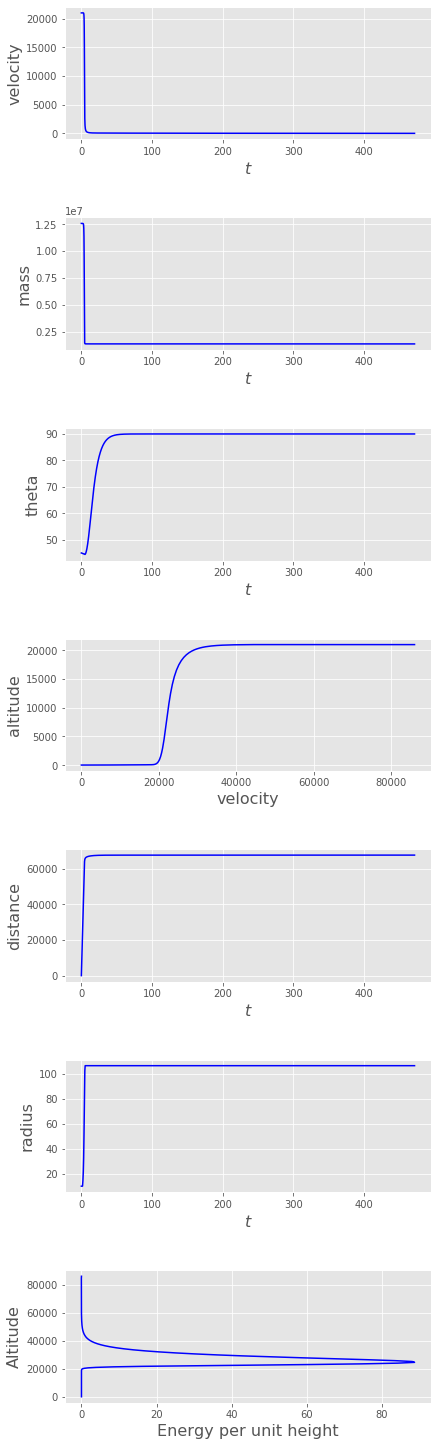

In [25]:
# plot result
armageddon.plot_element_6(result)

#### Mars

In [26]:
import armageddon

# Scenario: impact on Mars
# change atmos_func to 'mars and give mars parameters

mars = armageddon.Planet(atmos_func='mars',
                 Cd=1, Ch=0.1, Q=1e7, Cl=1e-3, alpha=0.3, 
                      Rp=33895e2,g=3.71, H=11100., rho0=0.02)

In [27]:
# method 1
result, outcome = mars.impact(radius=10, angle=45, strength=1e5, 
                               velocity=21e3, density=3000)

In [28]:
# method 2 can get the same results from method 1
result = mars.solve_atmospheric_entry(radius=10, angle=45, strength=1e5, 
                               velocity=21e3, density=3000)
result = earth.calculate_energy(result)
outcome = earth.analyse_outcome(result)

In [29]:
# total data
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,21000.000000,1.256637e+07,45.000000,100000.000000,0.000000,10.000000,0.00,0.000000
1,21000.126668,1.256636e+07,44.988164,99257.612325,721.338478,10.000000,0.05,-0.009914
2,21000.253260,1.256635e+07,44.976324,98515.373610,1442.983829,10.000000,0.10,-0.009899
3,21000.379763,1.256633e+07,44.964478,97773.283957,2164.936186,10.000000,0.15,-0.009880
4,21000.506163,1.256632e+07,44.952627,97031.343469,2887.195680,10.000000,0.20,-0.009857
5,21000.632448,1.256631e+07,44.940771,96289.552250,3609.762442,10.000000,0.25,-0.009831
6,21000.758605,1.256630e+07,44.928910,95547.910405,4332.636605,10.000000,0.30,-0.009802
7,21000.884622,1.256628e+07,44.917044,94806.418039,5055.818298,10.000000,0.35,-0.009769
8,21001.010486,1.256627e+07,44.905172,94065.075256,5779.307651,10.000000,0.40,-0.009733
9,21001.136187,1.256626e+07,44.893296,93323.882164,6503.104794,10.000000,0.45,-0.009694


In [30]:
# outcome about impact and airburst stats
outcome

{'outcome': 'Airburst and cratering',
 'burst_peak_dedz': 44.10617269647348,
 'burst_altitude': 1126.418862264051,
 'burst_total_ke_lost': 336.00276977987147,
 'impact_time': 6.849999999999984,
 'impact_mass': 7407914.87480428,
 'impact_speed': 18331.484087293782}

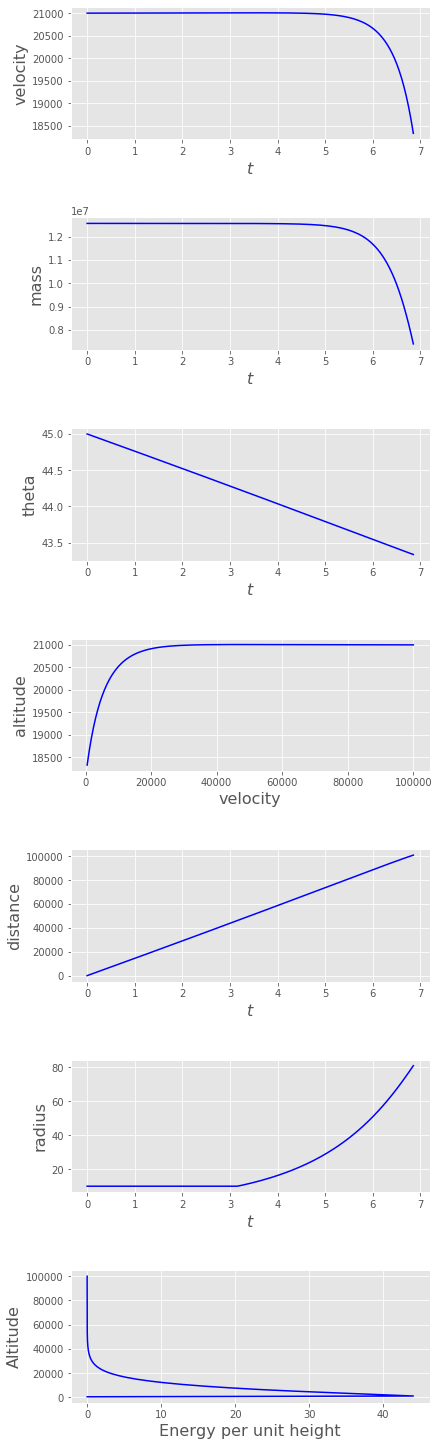

In [31]:
# plot result
armageddon.plot_element_6(result)

### ensemble

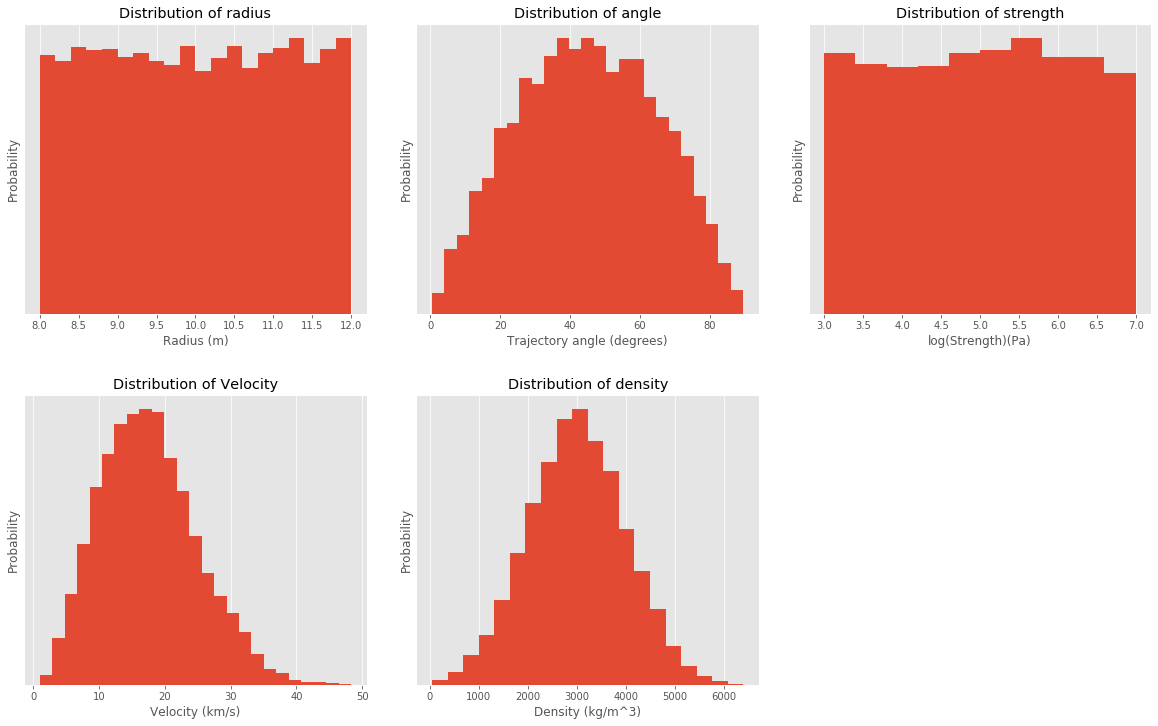

Wall time: 635 ms


In [32]:
%%time
# show each input distribution for 10000 samples

armageddon.plot_inputs5({'radius': 10, 'angle': 45, 
            'strength': 1e5, 'velocity': 21000, 'density': 30000})

In [33]:
%%time

# run 100 samples for 5 variables
# you can move any variable from variables to test

import armageddon
import numpy as np

slv_ens = armageddon.solve_ensemble(
    planet = armageddon.Planet(),
    fiducial_impact = {'radius': 10, 'angle': 45, 'strength': 1e5, 'velocity': 21000, 'density': 30000},
    variables = ['radius', 'angle', 'strength', 'velocity', 'density'],
    num = 100)

Wall time: 1min 39s


In [34]:
# result
slv_ens

,radius,angle,strength,velocity,density,burst_altitude
0,10.244502,47.549275,6.567236,8.962090,2952.134521,27250.043061
1,11.395194,53.164432,3.121321,11.437114,3323.158232,24392.066615
2,9.716297,39.519395,5.498945,17.423674,3616.571166,30054.075785
3,11.973120,58.352984,5.545785,13.264133,4191.176912,21975.810731
4,11.387194,32.805328,6.314473,15.048650,1947.744477,34445.978645
5,8.845928,41.923319,3.138961,19.331193,3518.355184,30983.555763
6,10.373464,13.213932,5.137461,26.167262,2507.985080,46963.941038
7,10.447184,43.114931,5.288423,13.353134,1761.972620,32810.690506
8,11.404274,56.957970,4.343333,14.830148,831.228312,35623.067539
9,9.931819,35.612456,5.323223,21.773718,3425.924259,32135.786855


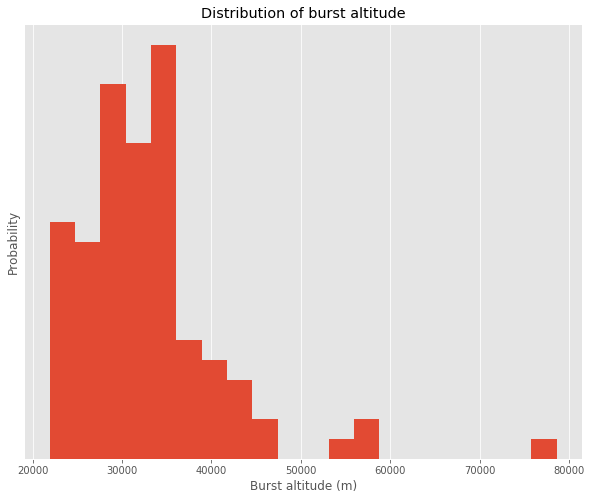

In [35]:
# plot distribution of results
armageddon.plot_output(slv_ens.burst_altitude)

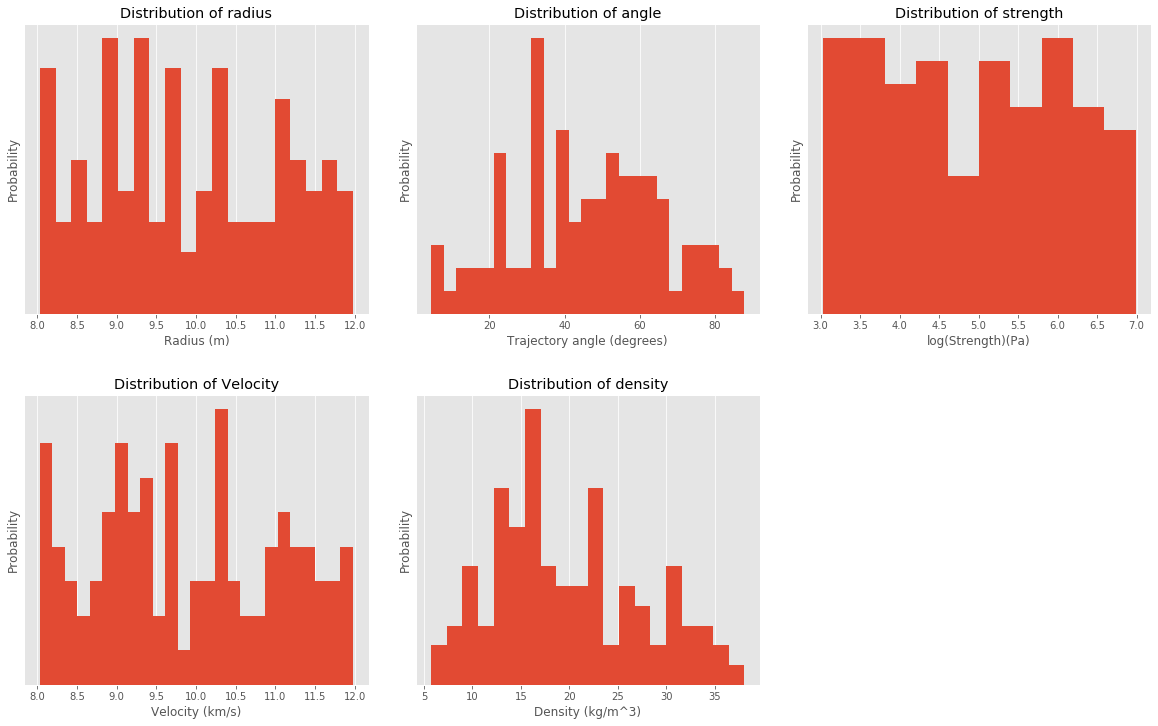

In [36]:
# plot input distribution
random_array = np.zeros((5, 100))
random_array[0] = slv_ens.radius
random_array[1] = slv_ens.angle
random_array[2] = slv_ens.strength
random_array[3] = slv_ens.radius
random_array[4] = slv_ens.velocity

armageddon.plot_distribution_5(random_array)

In [37]:
%%time
import armageddon
import numpy as np

# run 100 samples for 1 variable from 'radius', 'angle', 
#'strength', 'velocity', 'density'. 

slv_ens = armageddon.solve_ensemble(
    planet = armageddon.Planet(),
    fiducial_impact = {'radius': 10, 'angle': 45, 'strength': 1e5, 'velocity': 21000, 'density': 30000},
    variables = ['radius'],  num = 100)

Wall time: 14.3 s


In [38]:
# result
slv_ens

,radius,burst_altitude
0,8.335603,13580.474931
1,10.366544,10733.752360
2,8.500845,12946.078250
3,8.595646,12920.368907
4,8.614366,12915.421736
5,8.988330,12824.777593
6,9.270053,12162.035219
7,8.038840,13659.558926
8,8.615806,12915.042917
9,10.234982,10763.911337


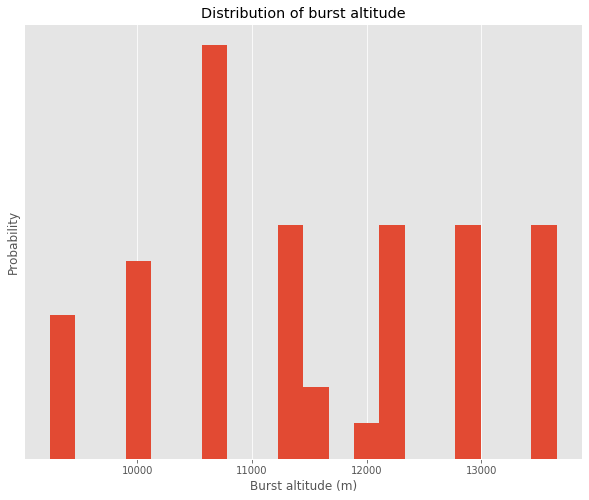

In [39]:
# plot distribution of results
armageddon.plot_output(slv_ens.burst_altitude)

### Computing errors and considerations on changes in dt

In [40]:
import armageddon
planet = armageddon.Planet()

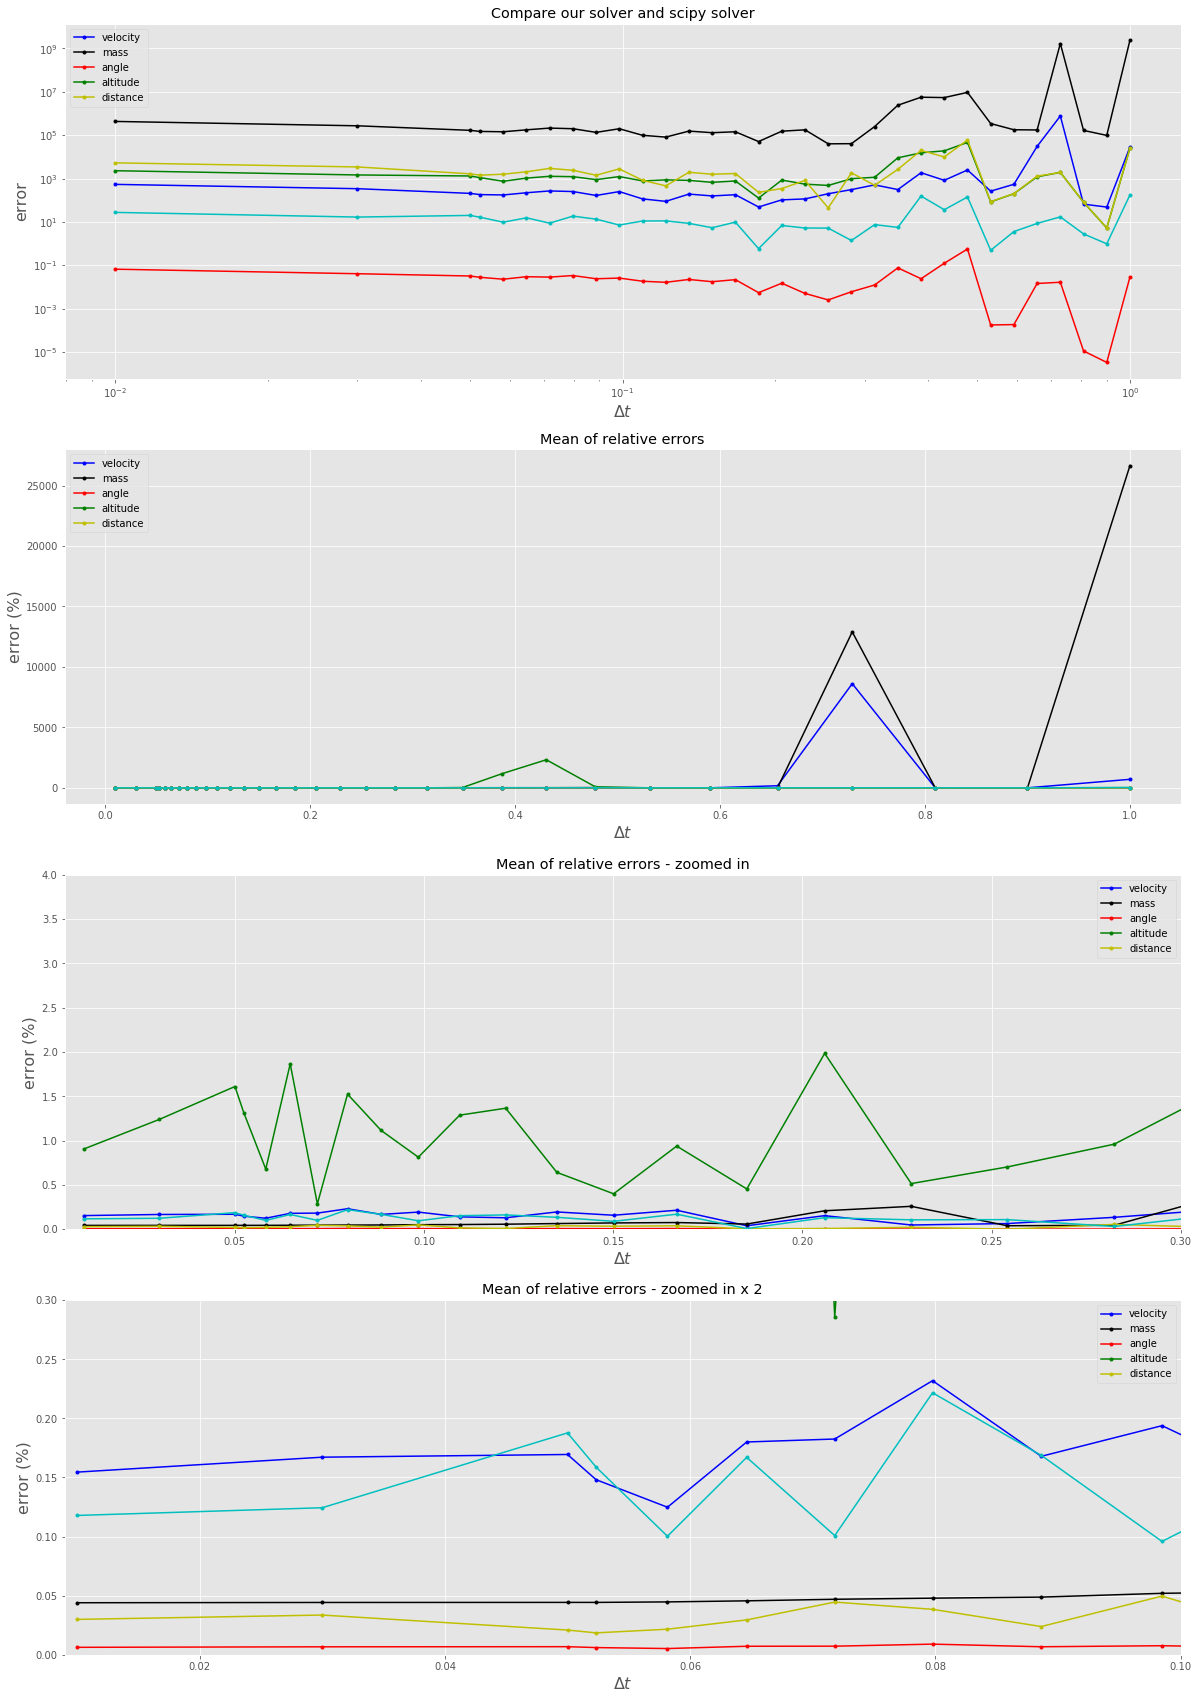

In [41]:
# compare the R4 solution with the scipy solution
errors = armageddon.compute_errors(planet)

In [42]:
# show the results in a dataframe
errors

,dt,velocity error (%),mass error (%),angle error (%),altitude error (%),distance error (%),radius error (%),overall error (%)
0,1.000000,704.010315,26657.646866,0.541783,16.992999,5.079873,24.857769,4568.188268
1,0.900000,0.045013,0.183121,0.000072,0.002988,0.001737,1.100310,0.222207
2,0.810000,0.067431,0.470575,0.000212,0.041696,0.017770,3.359199,0.659481
3,0.729000,8616.751299,12898.572545,0.234229,1.183040,0.369530,2.052060,3586.527117
4,0.656100,171.299475,1.280515,0.230588,0.678262,0.234692,1.301235,29.170794
5,0.590490,0.965805,0.409798,0.002399,0.090393,0.032790,2.948342,0.741588
6,0.531441,0.416598,1.924527,0.002106,0.030957,0.011015,0.277148,0.443725
7,0.478297,1.954376,21.036687,0.365990,81.931657,2.325014,3.961381,18.595851
8,0.430467,1.891441,11.497708,0.077475,2322.563621,0.367310,0.972786,389.561724
9,0.387420,0.726772,11.348352,0.015252,1176.571432,0.699175,3.923179,198.880693


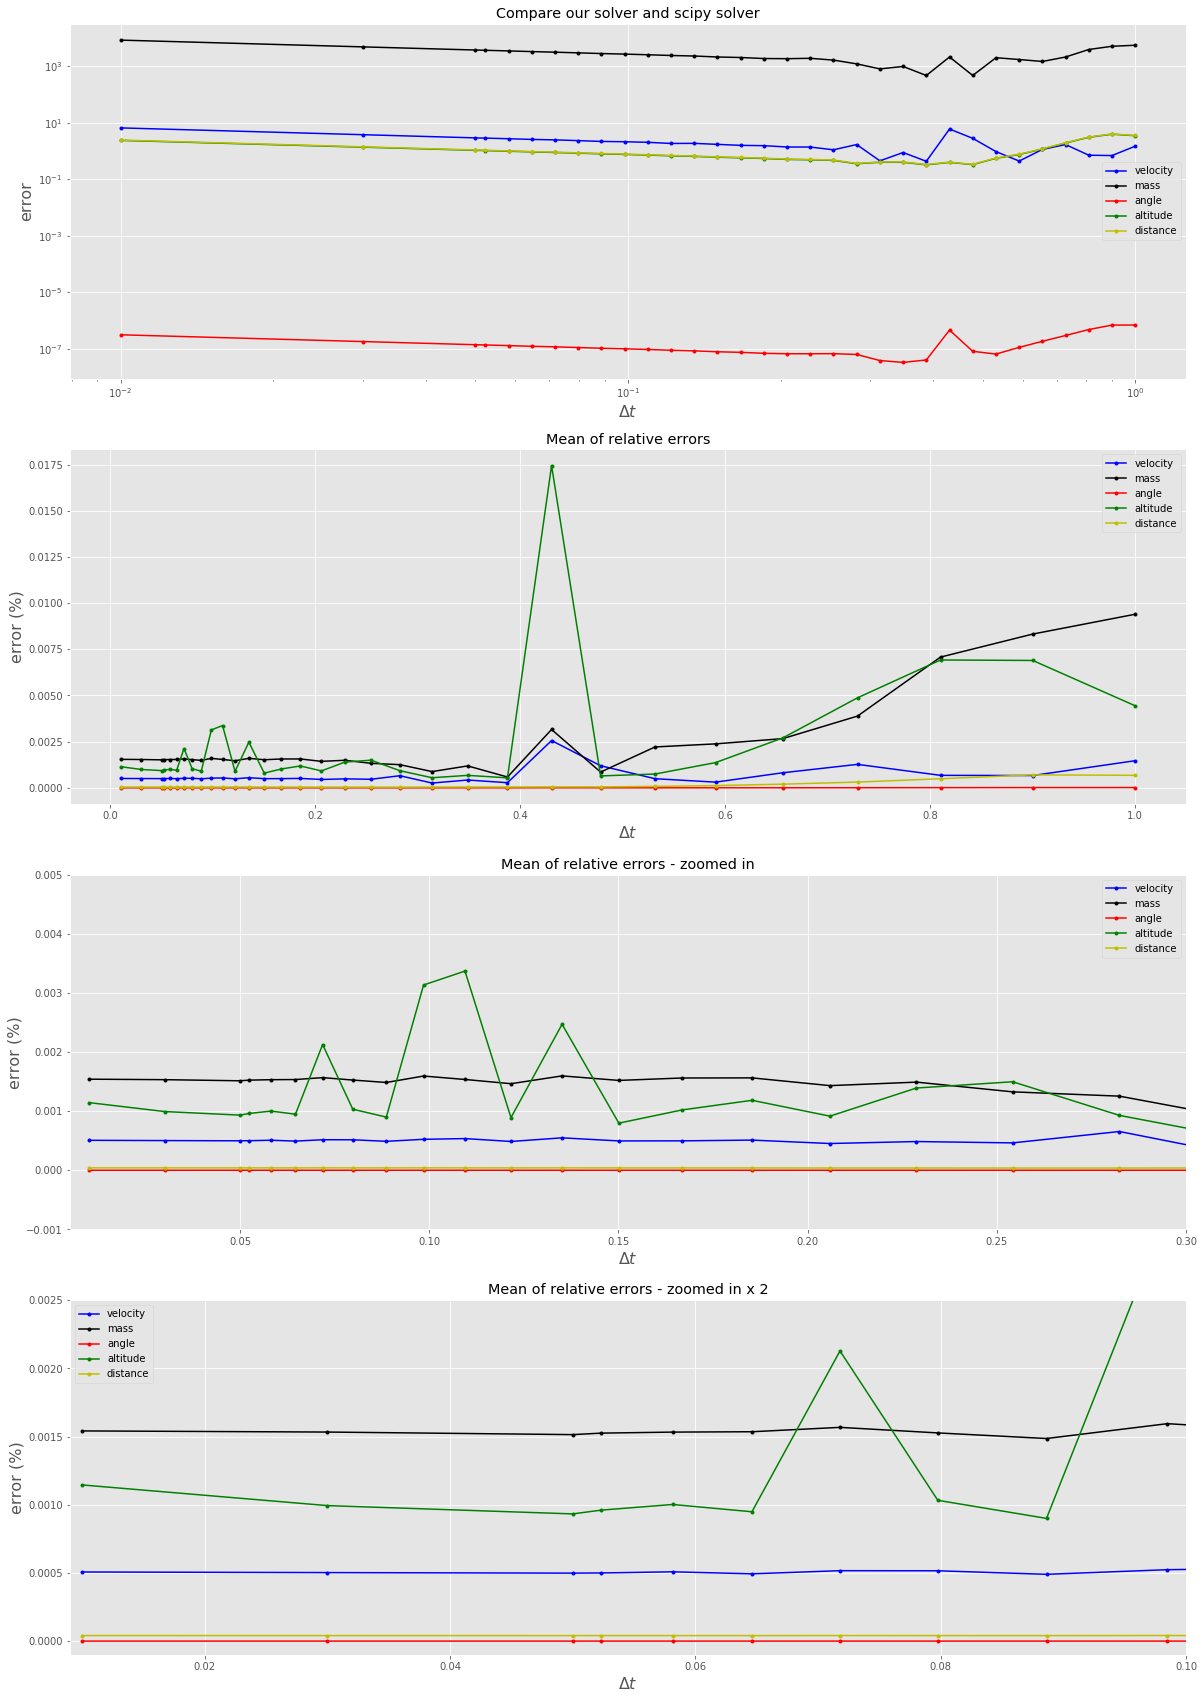

In [43]:
# compare the R4 solution with the scipy solution in case of no fragmentation
errors_without_fragmentation = armageddon.compute_errors(planet, fragmentation=False)

In [44]:
# show the results in a dataframe
errors_without_fragmentation

,dt,velocity error (%),mass error (%),angle error (%),altitude error (%),distance error (%),radius error (%),overall error (%)
0,1.000000,0.001469,0.009396,1.511023e-05,0.004440,0.000677,0.0,0.003199
1,0.900000,0.000666,0.008323,1.409843e-05,0.006894,0.000703,0.0,0.003320
2,0.810000,0.000676,0.007077,9.631539e-06,0.006921,0.000492,0.0,0.003035
3,0.729000,0.001270,0.003884,5.959752e-06,0.004873,0.000312,0.0,0.002069
4,0.656100,0.000816,0.002664,3.639954e-06,0.002702,0.000200,0.0,0.001277
5,0.590490,0.000308,0.002380,2.119037e-06,0.001366,0.000122,0.0,0.000836
6,0.531441,0.000494,0.002213,1.170915e-06,0.000747,0.000079,0.0,0.000707
7,0.478297,0.001196,0.000853,1.328652e-06,0.000646,0.000051,0.0,0.000549
8,0.430467,0.002559,0.003158,4.053256e-06,0.017444,0.000050,0.0,0.004643
9,0.387420,0.000278,0.000586,5.721323e-07,0.000541,0.000045,0.0,0.000290


d:\Document\python\ACSE-4\2\acse-4-armageddon-bennu-yuguang-chen\armageddon\dt_vs_errors.py:185: RuntimeWarning: overflow encountered in double_scalars
  -Ch*rhoa*A*v**3/(2*Q),
d:\Document\python\ACSE-4\2\acse-4-armageddon-bennu-yuguang-chen\armageddon\dt_vs_errors.py:185: RuntimeWarning: invalid value encountered in double_scalars
  -Ch*rhoa*A*v**3/(2*Q),
d:\Document\python\ACSE-4\2\acse-4-armageddon-bennu-yuguang-chen\armageddon\dt_vs_errors.py:184: RuntimeWarning: overflow encountered in double_scalars
  return np.array([-Cd*rhoa*A*v**2/(2*m)+g*np.sin(theta),
d:\Document\python\ACSE-4\2\acse-4-armageddon-bennu-yuguang-chen\armageddon\dt_vs_errors.py:189: RuntimeWarning: overflow encountered in double_scalars
  (np.sqrt(7/2*alpha*(rhoa/rhom))*v if rhoa*v**2 >= Y else 0)])
d:\Document\python\ACSE-4\2\acse-4-armageddon-bennu-yuguang-chen\armageddon\dt_vs_errors.py:186: RuntimeWarning: overflow encountered in double_scalars
  g*np.cos(theta)/v-Cl*rhoa*A*v/(2*m)-v*np.cos(theta)/(Rp+z),
d

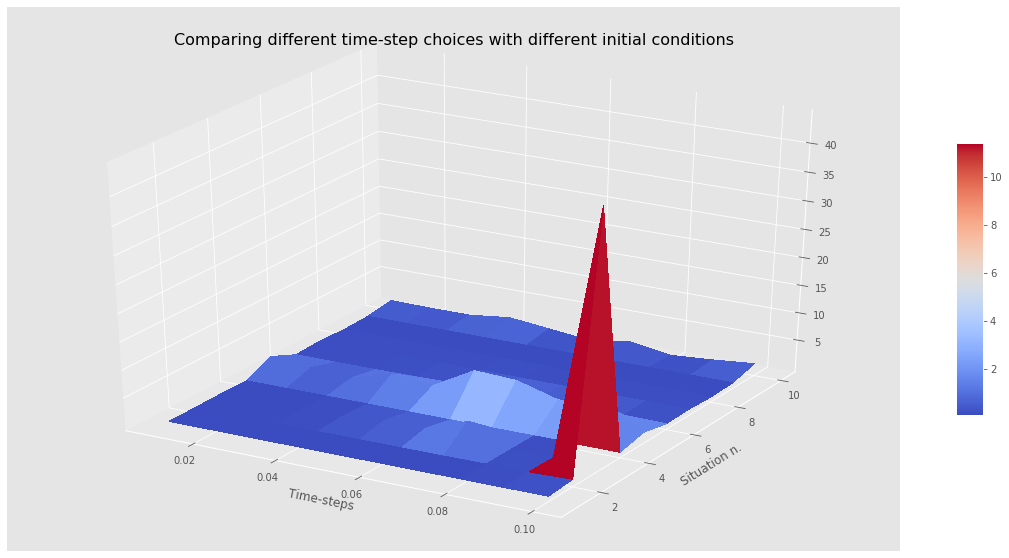

In [45]:
# compare the errors for different dt with different initial conditions
comparison = armageddon.dt_comparison(planet)

In [46]:
# show the comparison in a dataframe
comparison

,dt,Mean error (%),Max error (%),Min error (%),Change in error (%),Time for num. solution,Change in time (%),Space used (in rows),Change in space (%)
0,0.10,4.843561,44.763122,0.027600,809.647563,0.502999,-48.144642,5000.0,-50.00
1,0.09,0.694537,4.965543,0.072099,30.437910,0.528000,-45.567223,5556.0,-44.44
2,0.08,0.594879,4.058275,0.032970,11.721624,0.601000,-38.041430,6251.0,-37.49
3,0.07,1.256987,6.182253,0.010902,136.069079,0.672005,-30.721315,7143.0,-28.57
4,0.06,0.965362,6.540924,0.058141,81.300392,0.772997,-20.309806,8334.0,-16.66
5,0.05,0.532466,2.410220,0.045459,0.000000,0.970003,0.000000,10000.0,0.00
6,0.04,0.598519,3.116151,0.053319,12.405091,1.176998,21.339623,12500.0,25.00
7,0.03,0.261682,0.933218,0.024899,-50.854705,1.571002,61.958423,16667.0,66.67
8,0.02,0.308650,1.448781,0.030924,-42.033789,2.384003,145.772754,25001.0,150.01
9,0.01,0.390457,2.138698,0.038866,-26.670106,4.688000,383.297431,50001.0,400.01


### Ddetermine the impactor parameters (asteroid size & strength) for the Chelyabinsk airburst, by fitting your model solutions of kinetic energy loss per unit height vs. altitude to the inferred energy deposition curve

In [47]:
import armageddon
import numpy as np

earth = armageddon.Planet()
f_event,height,= armageddon.f_fit_event("data/ChelyabinskEnergyAltitude.csv")
radiu,stre,error = armageddon.get_best_fit(earth, f_event, height, \
                np.linspace(8.1,8.5,10), np.linspace(4.8*10**6, 5.5*10**6, 10))
print('radiu:', radiu, '\nstrength:', stre, '\nMSR: ', error)


radiu: 8.5 
strength: 5266666.666666667 
MSR:  5.178365873396135


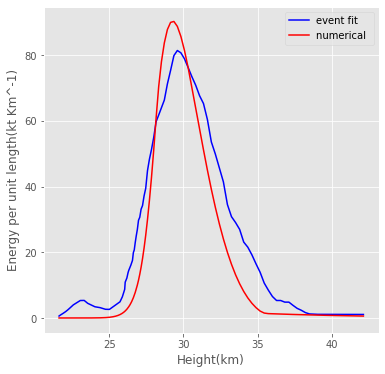

In [48]:
armageddon.plot_pre3(earth, f_event,height, radiu, stre)

### Analytical Solution V.S. Numerical Solution

In [1]:
import armageddon
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('ggplot')

In [2]:
sol = armageddon.get_solver_result_analytical(armageddon.solver)

Analytical Solution under the conditions:
g=0; R_P=infinity; C_L=0; no ablation; no fragmentation


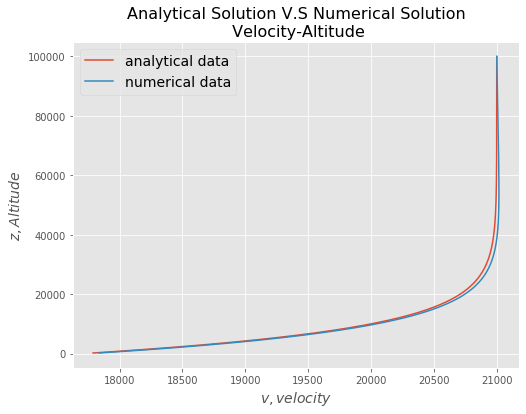

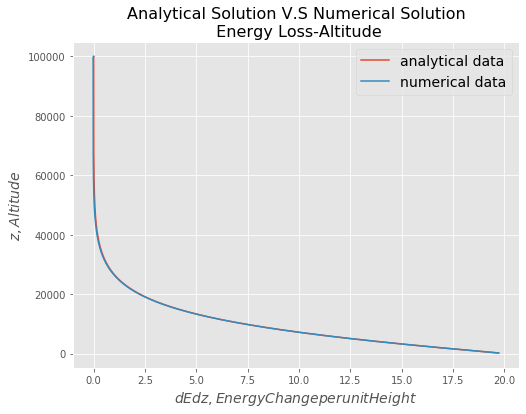

In [3]:
v_position,dE_dz_position = armageddon.plot_analytical(numerical=True,num_result=sol)

assert np.allclose(v_position,sol.velocity,rtol=1e-2)
assert np.allclose(dE_dz_position,sol.dedz,rtol=1e-2,atol=2)

### Solver Solution V.S. Scipy Solution

In [49]:
# Beofre run below functions, choose one of inputs data to test
# you can also customize your own data to test

In [4]:
#Exponential atmosphere on earth

input_data = {'radius': 10.,
              'velocity': 21000,
              'density': 3000.,
              'strength': 1e5,
              'angle': 45.0,
              'init_altitude':100000,
              'dt': 0.01,
              'radians': False,
              't_0': 0,
              't_end': 1000,
              'tol': 1e-4,
              'analytical': False}


setting = {'atmos_func':'exponential','atmos_filename':None,
           'Cd':1., 'Ch':0.1, 'Q':1e7, 'Cl':1e-3,
           'alpha':0.3, 'Rp':6371e3,
           'g':9.81, 'H':8000., 'rho0':1.2}
alldata = {**setting, **input_data}

In [5]:
#Exponential atmosphere on earth

input_data = {'radius': 10.,
              'velocity': 21000,
              'density': 3000.,
              'strength': 1e5,
              'angle': 45.0,
              'init_altitude':100000,
              'dt': 0.01,
              'radians': False,
              't_0': 0,
              't_end': 1000,
              'tol': 1e-4,
              'analytical': False}


setting = {'atmos_func':'exponential','atmos_filename':None,
           'Cd':1., 'Ch':0.1, 'Q':1e7, 'Cl':1e-3,
           'alpha':0.3, 'Rp':6371e3,
           'g':9.81, 'H':8000., 'rho0':1.2}
alldata = {**setting, **input_data}

In [6]:
#Exponential atmosphere on earth

input_data = {'radius': 10.,
              'velocity': 21000,
              'density': 3000.,
              'strength': 1e5,
              'angle': 45.0,
              'init_altitude':100000,
              'dt': 0.01,
              'radians': False,
              't_0': 0,
              't_end': 1000,
              'tol': 1e-4,
              'analytical': False}


setting = {'atmos_func':'exponential','atmos_filename':None,
           'Cd':1., 'Ch':0.1, 'Q':1e7, 'Cl':1e-3,
           'alpha':0.3, 'Rp':6371e3,
           'g':9.81, 'H':8000., 'rho0':1.2}
alldata = {**setting, **input_data}

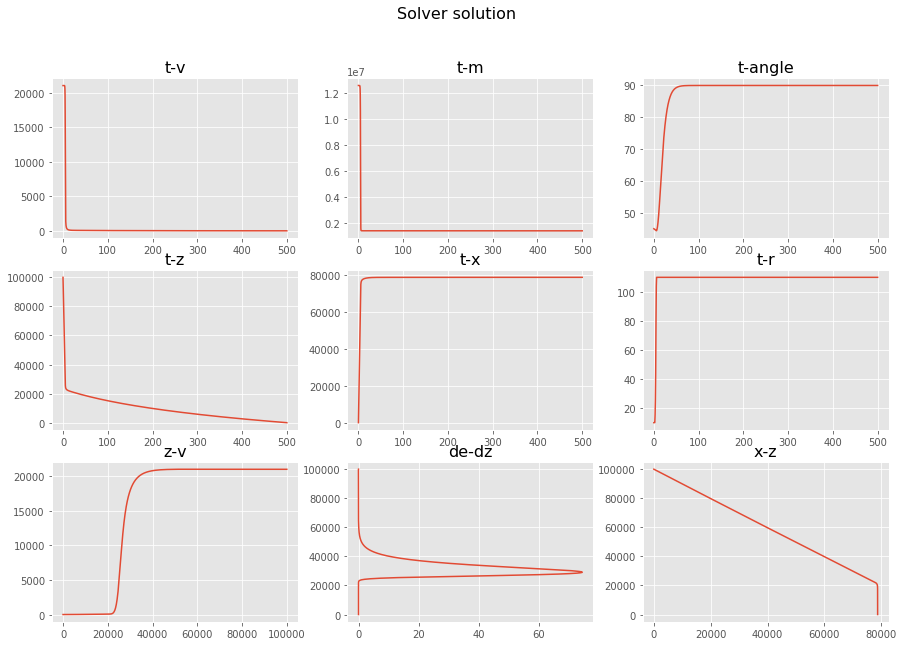

In [7]:
# Run functions
sol = armageddon.get_solver_result(alldata,armageddon.solver)
sci = armageddon.sci_result(setting,alldata)
armageddon.plot_single(sol,title ='Solver solution')

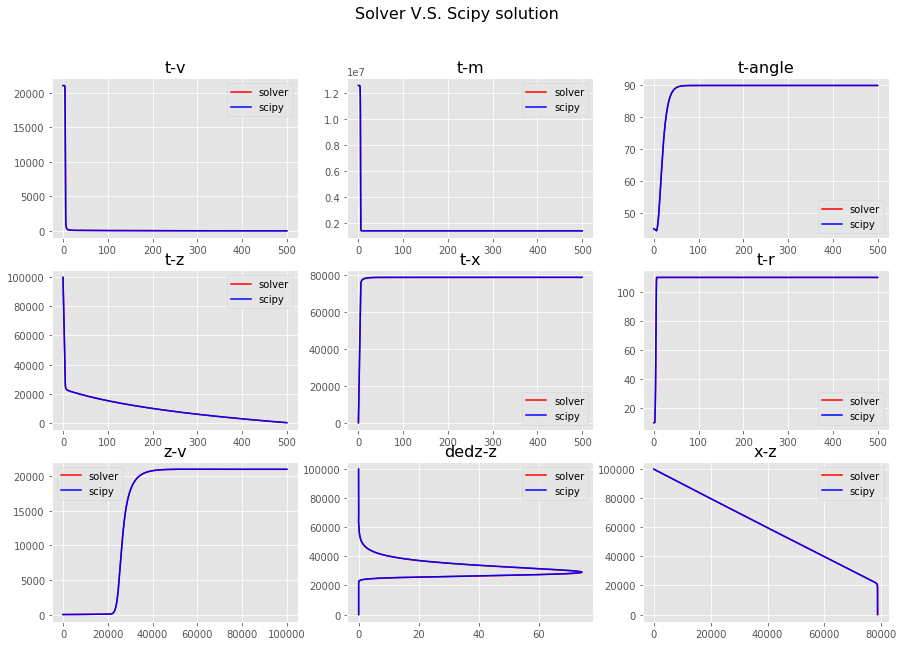

In [8]:
armageddon.plot_contrast(sol,sci,title ='Solver V.S. Scipy solution')

In [9]:
#Test with np.isclose
truncation = min(len(sci.velocity), len(sol.velocity))
sci = sci.drop(sci.index[truncation:])
sol=sol.drop(sol.index[truncation:])

In [10]:
for i in sol.columns:
    print('Accuracy of ',i, ' is:',sum(np.isclose(sol.velocity,sci.velocity,rtol=1e-2))/len(sol.velocity))

Accuracy of  velocity  is: 1.0
Accuracy of  mass  is: 1.0
Accuracy of  angle  is: 1.0
Accuracy of  altitude  is: 1.0
Accuracy of  distance  is: 1.0
Accuracy of  radius  is: 1.0
Accuracy of  time  is: 1.0
Accuracy of  dedz  is: 1.0
